In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [24]:
print(len(train_data))

8982


In [25]:
print(len(test_data))

2246


In [26]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [27]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [28]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [29]:
print(train_labels[0])

3


In [30]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [35]:
history = model.fit(partial_x_train, 
          partial_y_train, 
          epochs=20, 
          batch_size=512, 
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 80us/step - loss: 2.7783 - acc: 0.5021 - val_loss: 1.8357 - val_acc: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.4835 - acc: 0.6922 - val_loss: 1.3450 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.0786 - acc: 0.7727 - val_loss: 1.1508 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.8463 - acc: 0.8222 - val_loss: 1.0430 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.6728 - acc: 0.8596 - val_loss: 0.9650 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.5374 - acc: 0.8884 - val_loss: 0.9397 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.4358 - acc: 0.9089 - val_loss: 0.8882 - val_acc: 0.8180
Epoch 8

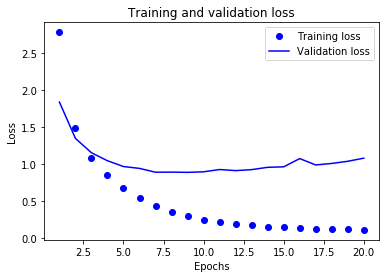

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

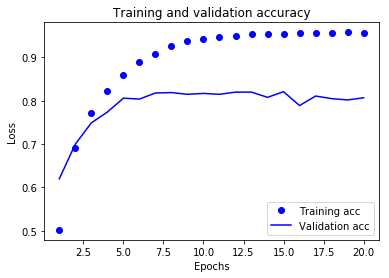

In [37]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 90us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 67us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 76us/step - loss: 1.1286 - acc: 0.7676 - val_loss: 1.1845 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.8774 - acc: 0.8226 - val_loss: 1.0474 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.6982 - acc: 0.8559 - val_loss: 0.9800 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.5531 - acc: 0.8899 - val_loss: 0.9446 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.4479 - acc: 0.9100 - val_loss: 0.9432 - val_acc: 0.8090
Epoch 8/9
7982

In [40]:
predictions = model.predict(x_test)
print(predictions[0])

[5.8379132e-06 1.6278414e-04 8.2622297e-05 6.5313762e-01 3.3258376e-01
 2.7940500e-06 4.4886703e-05 1.0245408e-05 3.4673174e-03 1.4303880e-05
 4.1804313e-05 8.9201145e-04 9.7792625e-05 8.4639358e-04 1.3177764e-05
 4.7694059e-05 1.4548821e-03 3.8567782e-04 1.7637800e-05 2.4410475e-03
 2.3547320e-03 1.6151210e-04 1.9043881e-06 4.6159839e-05 5.2084756e-06
 9.4834228e-05 6.1489477e-06 1.5740966e-06 2.4453856e-04 1.1418732e-04
 3.0850006e-05 7.9712932e-05 2.1582079e-04 1.5677513e-05 1.2814909e-05
 7.4484624e-06 3.1020126e-04 4.9422556e-06 1.2923031e-05 3.2144281e-04
 2.2132253e-05 1.1627955e-04 5.4149583e-05 1.1431224e-05 1.7739851e-06
 1.2259943e-06]


In [41]:
print(np.argmax(predictions[0]))

3
